In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as stats

In [119]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [120]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths.csv')

In [121]:
df_monthly.shape

(98, 3)

In [122]:
df_yearly.shape

(12, 4)

In [123]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [124]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [125]:
df_monthly.head()

date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2

In [126]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [127]:
df_yearly.value_counts('year').index.values

array([1841, 1842, 1843, 1844, 1845, 1846], dtype=int64)

In [128]:
df_monthly.value_counts('date').index.values

array(['1841-01-01', '1847-03-01', '1847-01-01', '1846-12-01',
       '1846-11-01', '1846-10-01', '1846-09-01', '1846-08-01',
       '1846-07-01', '1846-06-01', '1846-05-01', '1846-04-01',
       '1846-03-01', '1846-02-01', '1846-01-01', '1845-12-01',
       '1845-11-01', '1845-10-01', '1845-09-01', '1845-08-01',
       '1845-07-01', '1845-06-01', '1845-05-01', '1847-02-01',
       '1847-04-01', '1841-02-01', '1847-05-01', '1849-02-01',
       '1849-01-01', '1848-12-01', '1848-11-01', '1848-10-01',
       '1848-09-01', '1848-08-01', '1848-07-01', '1848-06-01',
       '1848-05-01', '1848-04-01', '1848-03-01', '1848-02-01',
       '1848-01-01', '1847-12-01', '1847-11-01', '1847-10-01',
       '1847-09-01', '1847-08-01', '1847-07-01', '1847-06-01',
       '1845-04-01', '1845-03-01', '1845-02-01', '1845-01-01',
       '1842-12-01', '1842-11-01', '1842-10-01', '1842-09-01',
       '1842-08-01', '1842-07-01', '1842-06-01', '1842-05-01',
       '1842-04-01', '1842-03-01', '1842-02-01', '1842-

In [129]:
df_monthly.isna().any()

date      False
births    False
deaths    False
dtype: bool

In [130]:
df_yearly.isna().any()

year      False
births    False
deaths    False
clinic    False
dtype: bool

In [131]:
df_monthly.duplicated().any()

False

In [132]:
df_yearly.duplicated().any()

False

In [133]:
df_monthly.births.mean()

267.0

In [134]:
df_monthly.deaths.mean()

22.46938775510204

In [135]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [136]:
df_yearly.deaths.mean()

223.33333333333334

In [137]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


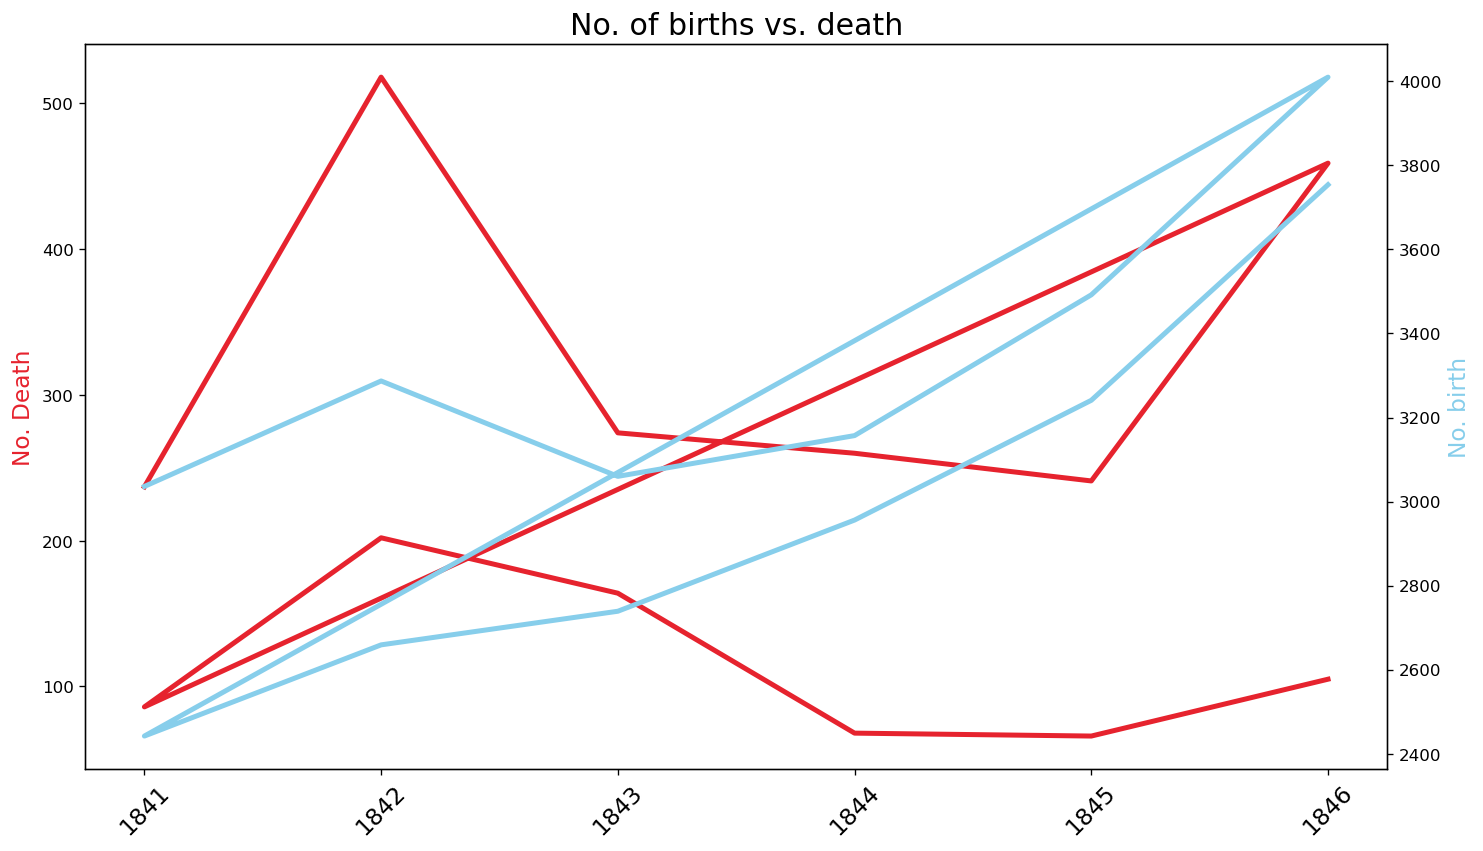

In [138]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('No. of births vs. death', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('No. Death', color='#E6232E', fontsize=14)
ax2.set_ylabel('No. birth', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
 
ax1.plot(df_yearly.year, df_yearly.deaths, color='#E6232E', linewidth=3)
ax2.plot(df_yearly.year, df_yearly.births, color='skyblue', linewidth=3)
 
plt.show()

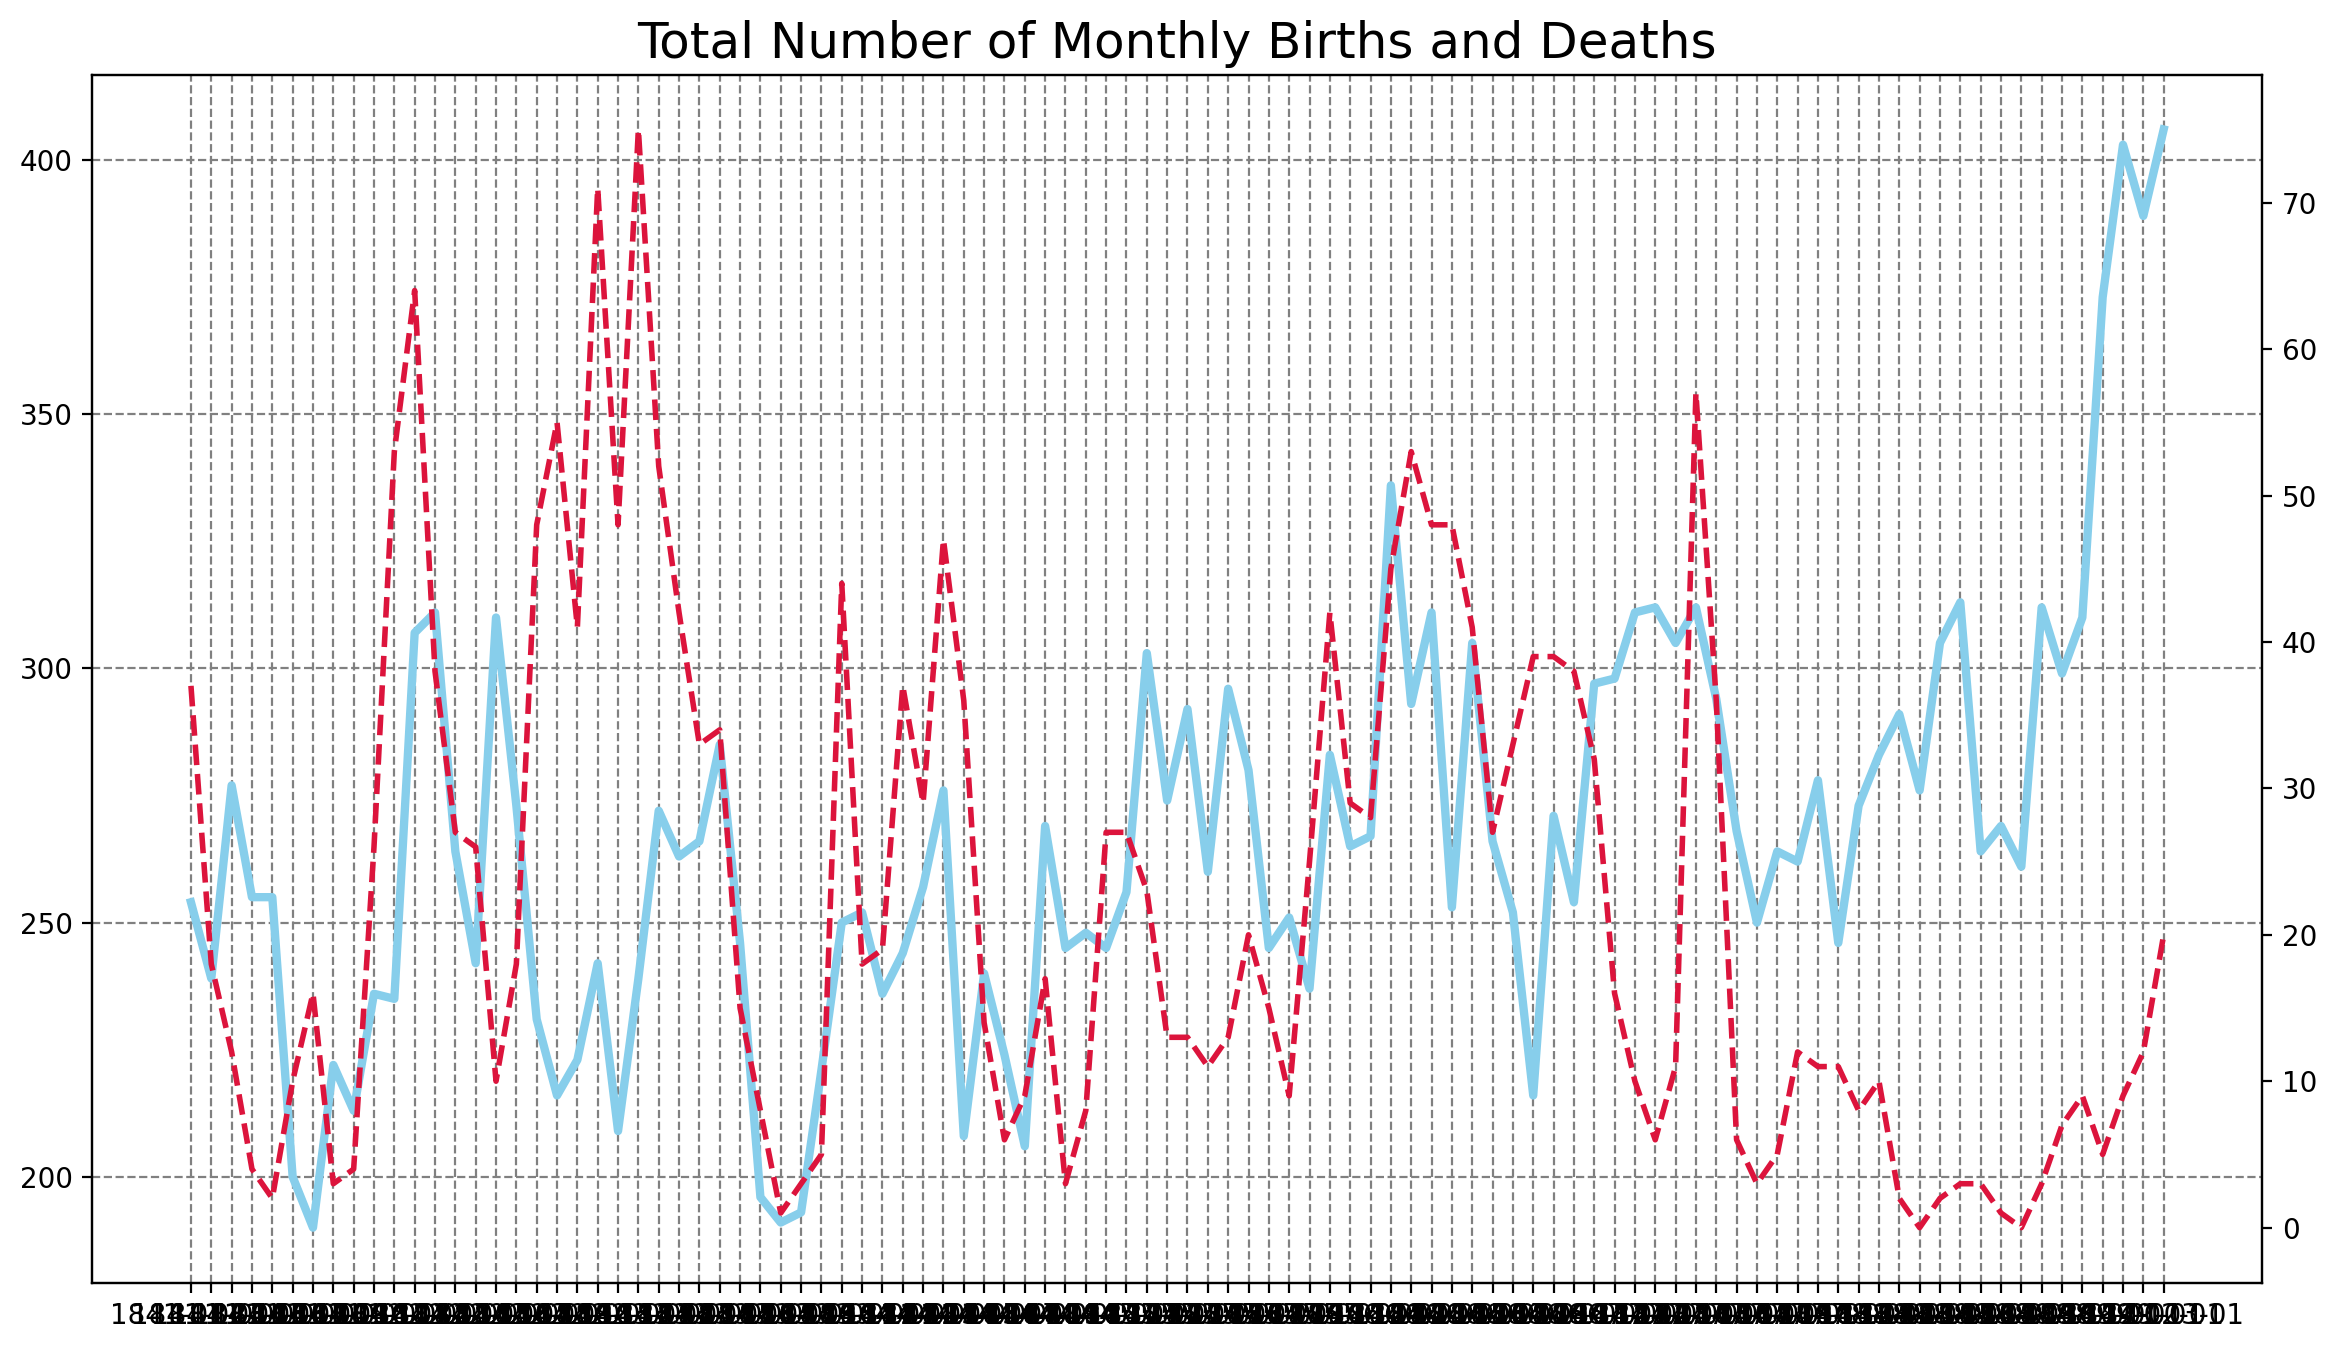

In [139]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

In [140]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 

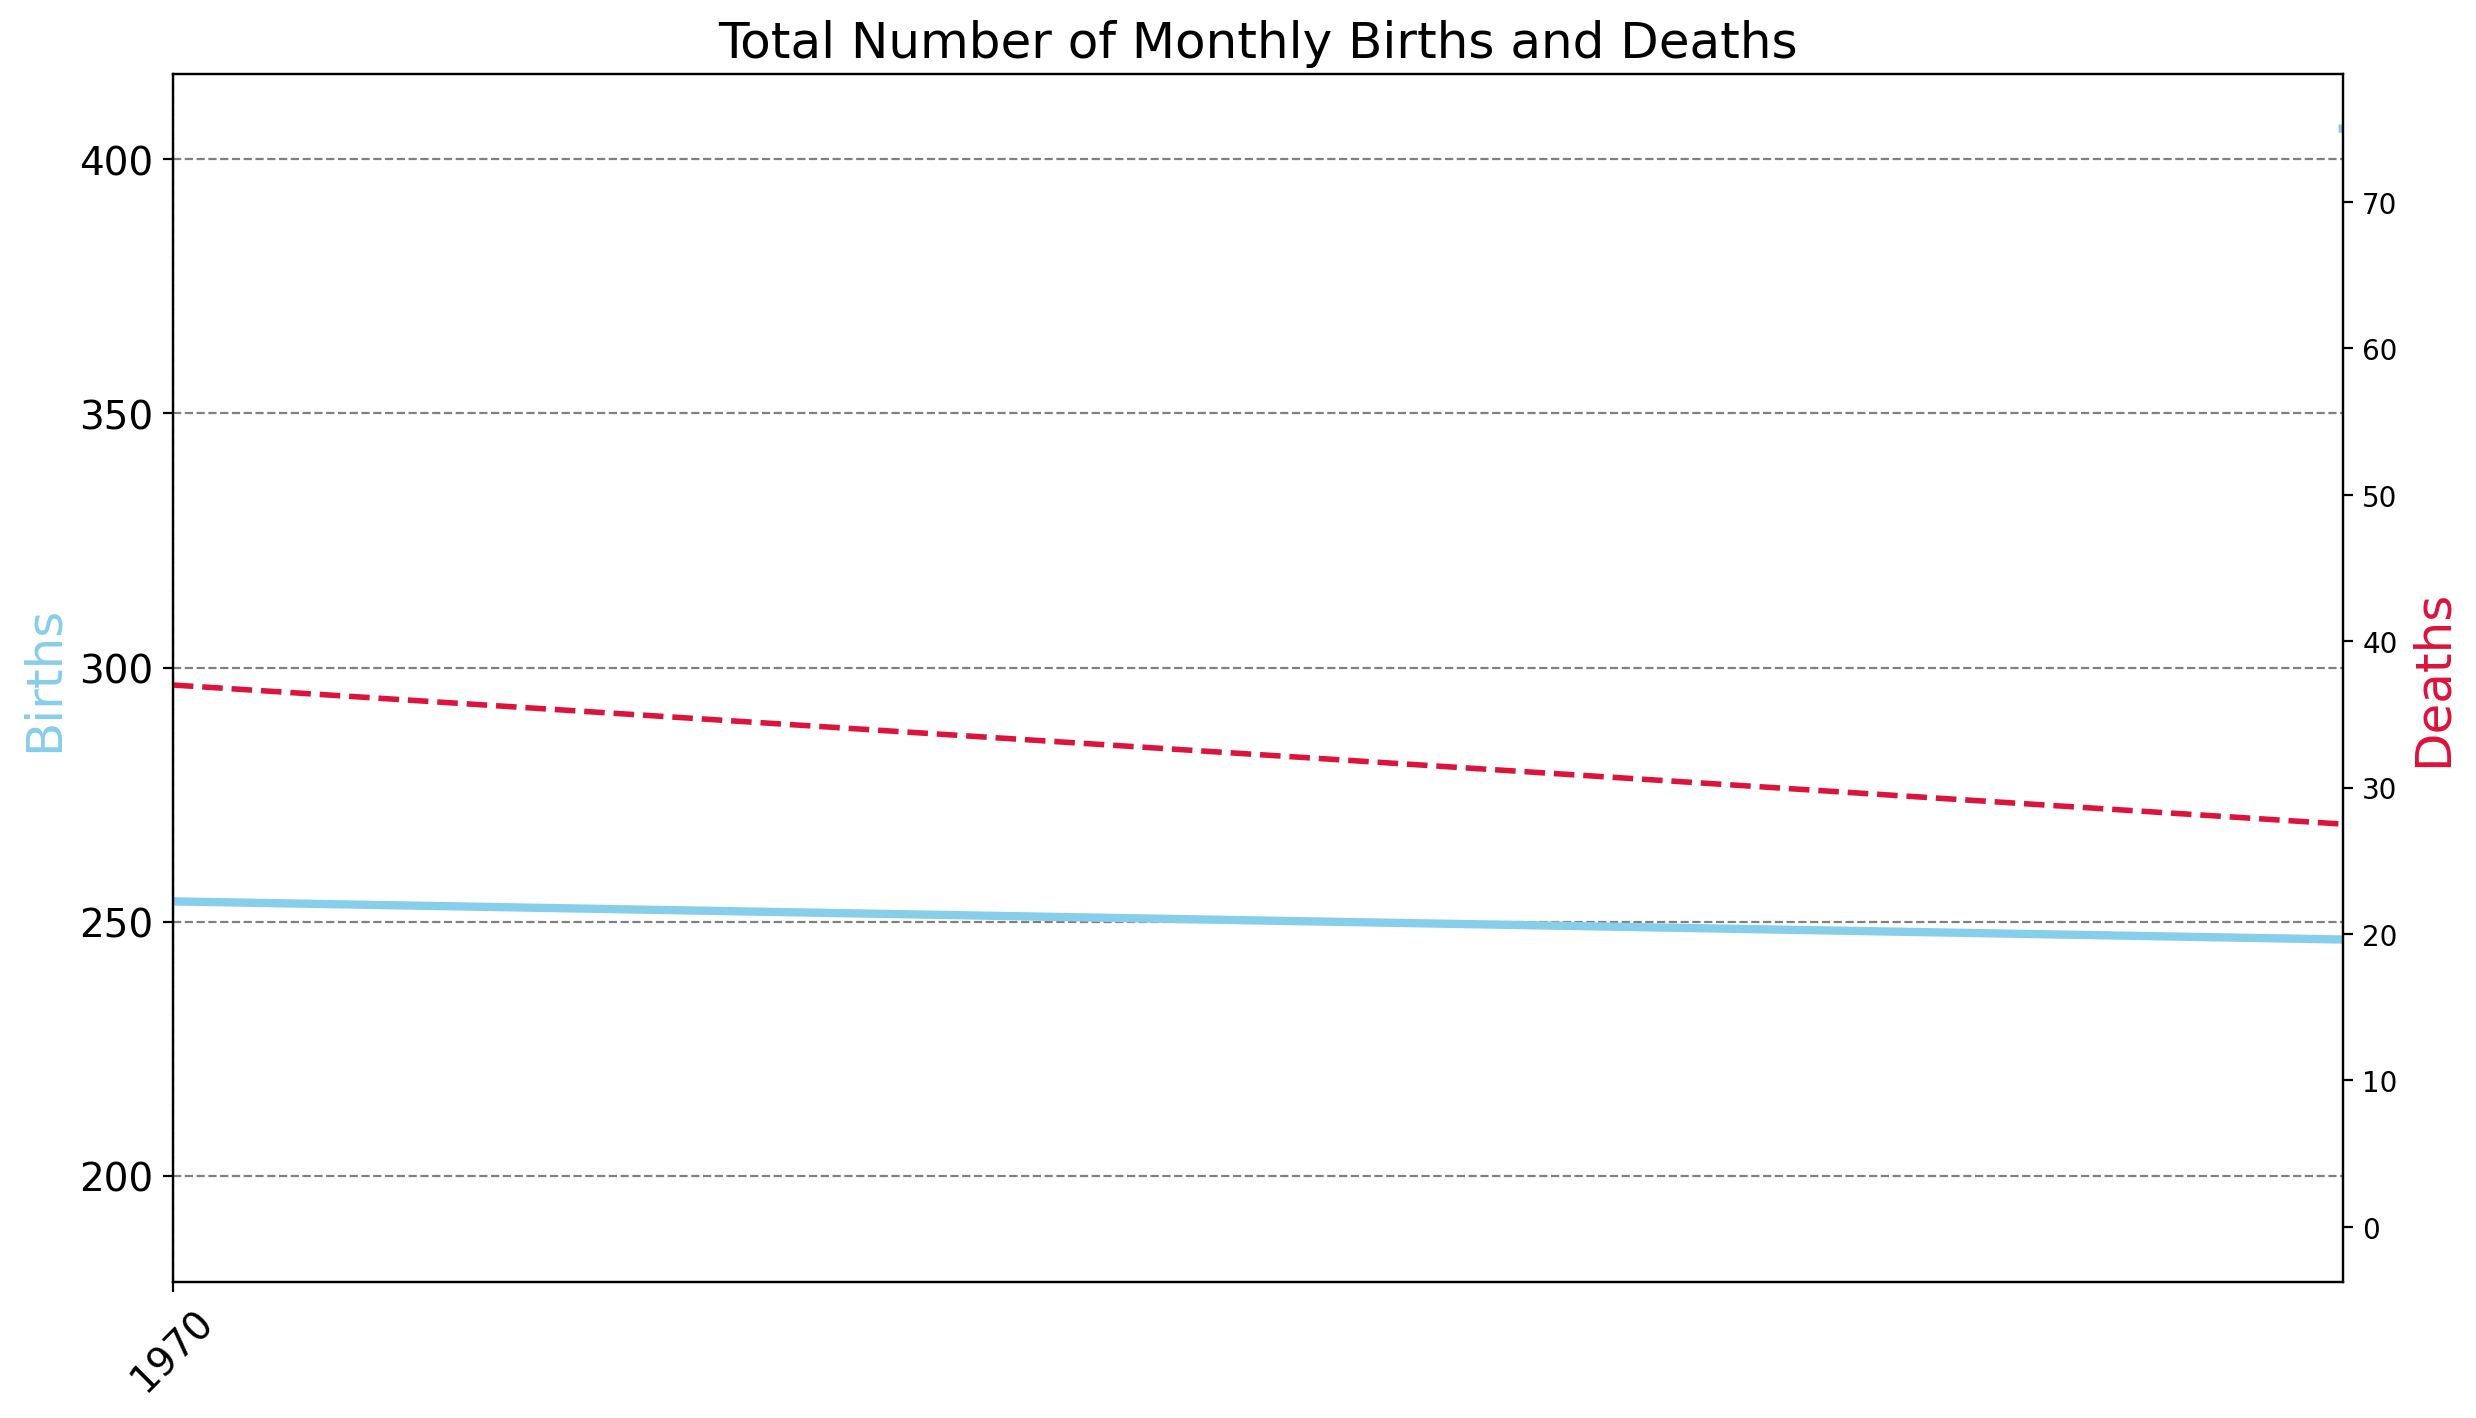

In [141]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

In [142]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [143]:
df_yearly[df_yearly.clinic == 'clinic 1'].births.sum()

20042

In [144]:
df_yearly[df_yearly.clinic == 'clinic 2'].births.sum()

17791

In [145]:
df_yearly.clinic.unique()

array(['clinic 1', 'clinic 2'], dtype=object)

In [146]:
df_yearly[df_yearly.clinic == 'clinic 1'].deaths.sum()

1989

In [147]:
df_yearly[df_yearly.clinic == 'clinic 2'].deaths.sum()

691

In [148]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [149]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

In [150]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [151]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [152]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


In [153]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

In [154]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

In [155]:
df_monthly.head()

date  births  deaths  pct_deaths
0  1841-01-01     254      37        0.15
1  1841-02-01     239      18        0.08
2  1841-03-01     277      12        0.04
3  1841-04-01     255       4        0.02
4  1841-05-01     255       2        0.01

In [156]:
df_monthly.date = pd.to_datetime(df_monthly.date)

In [157]:
df_pre_wash = df_monthly[df_monthly.date < '1846-06-01']

In [158]:
df_post_wash = df_monthly[df_monthly.date >= '1846-06-01']

In [159]:
df_pre_wash.deaths.mean()

26.8125

In [160]:
df_post_wash.deaths.mean()

14.294117647058824

In [161]:
bw_rate = df_pre_wash.deaths.sum() / df_pre_wash.births.sum() * 100
aw_rate = df_post_wash.deaths.sum() / df_post_wash.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.6%
Average death rate AFTER 1847 was 4.87%


In [162]:
roll_df = df_pre_wash.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

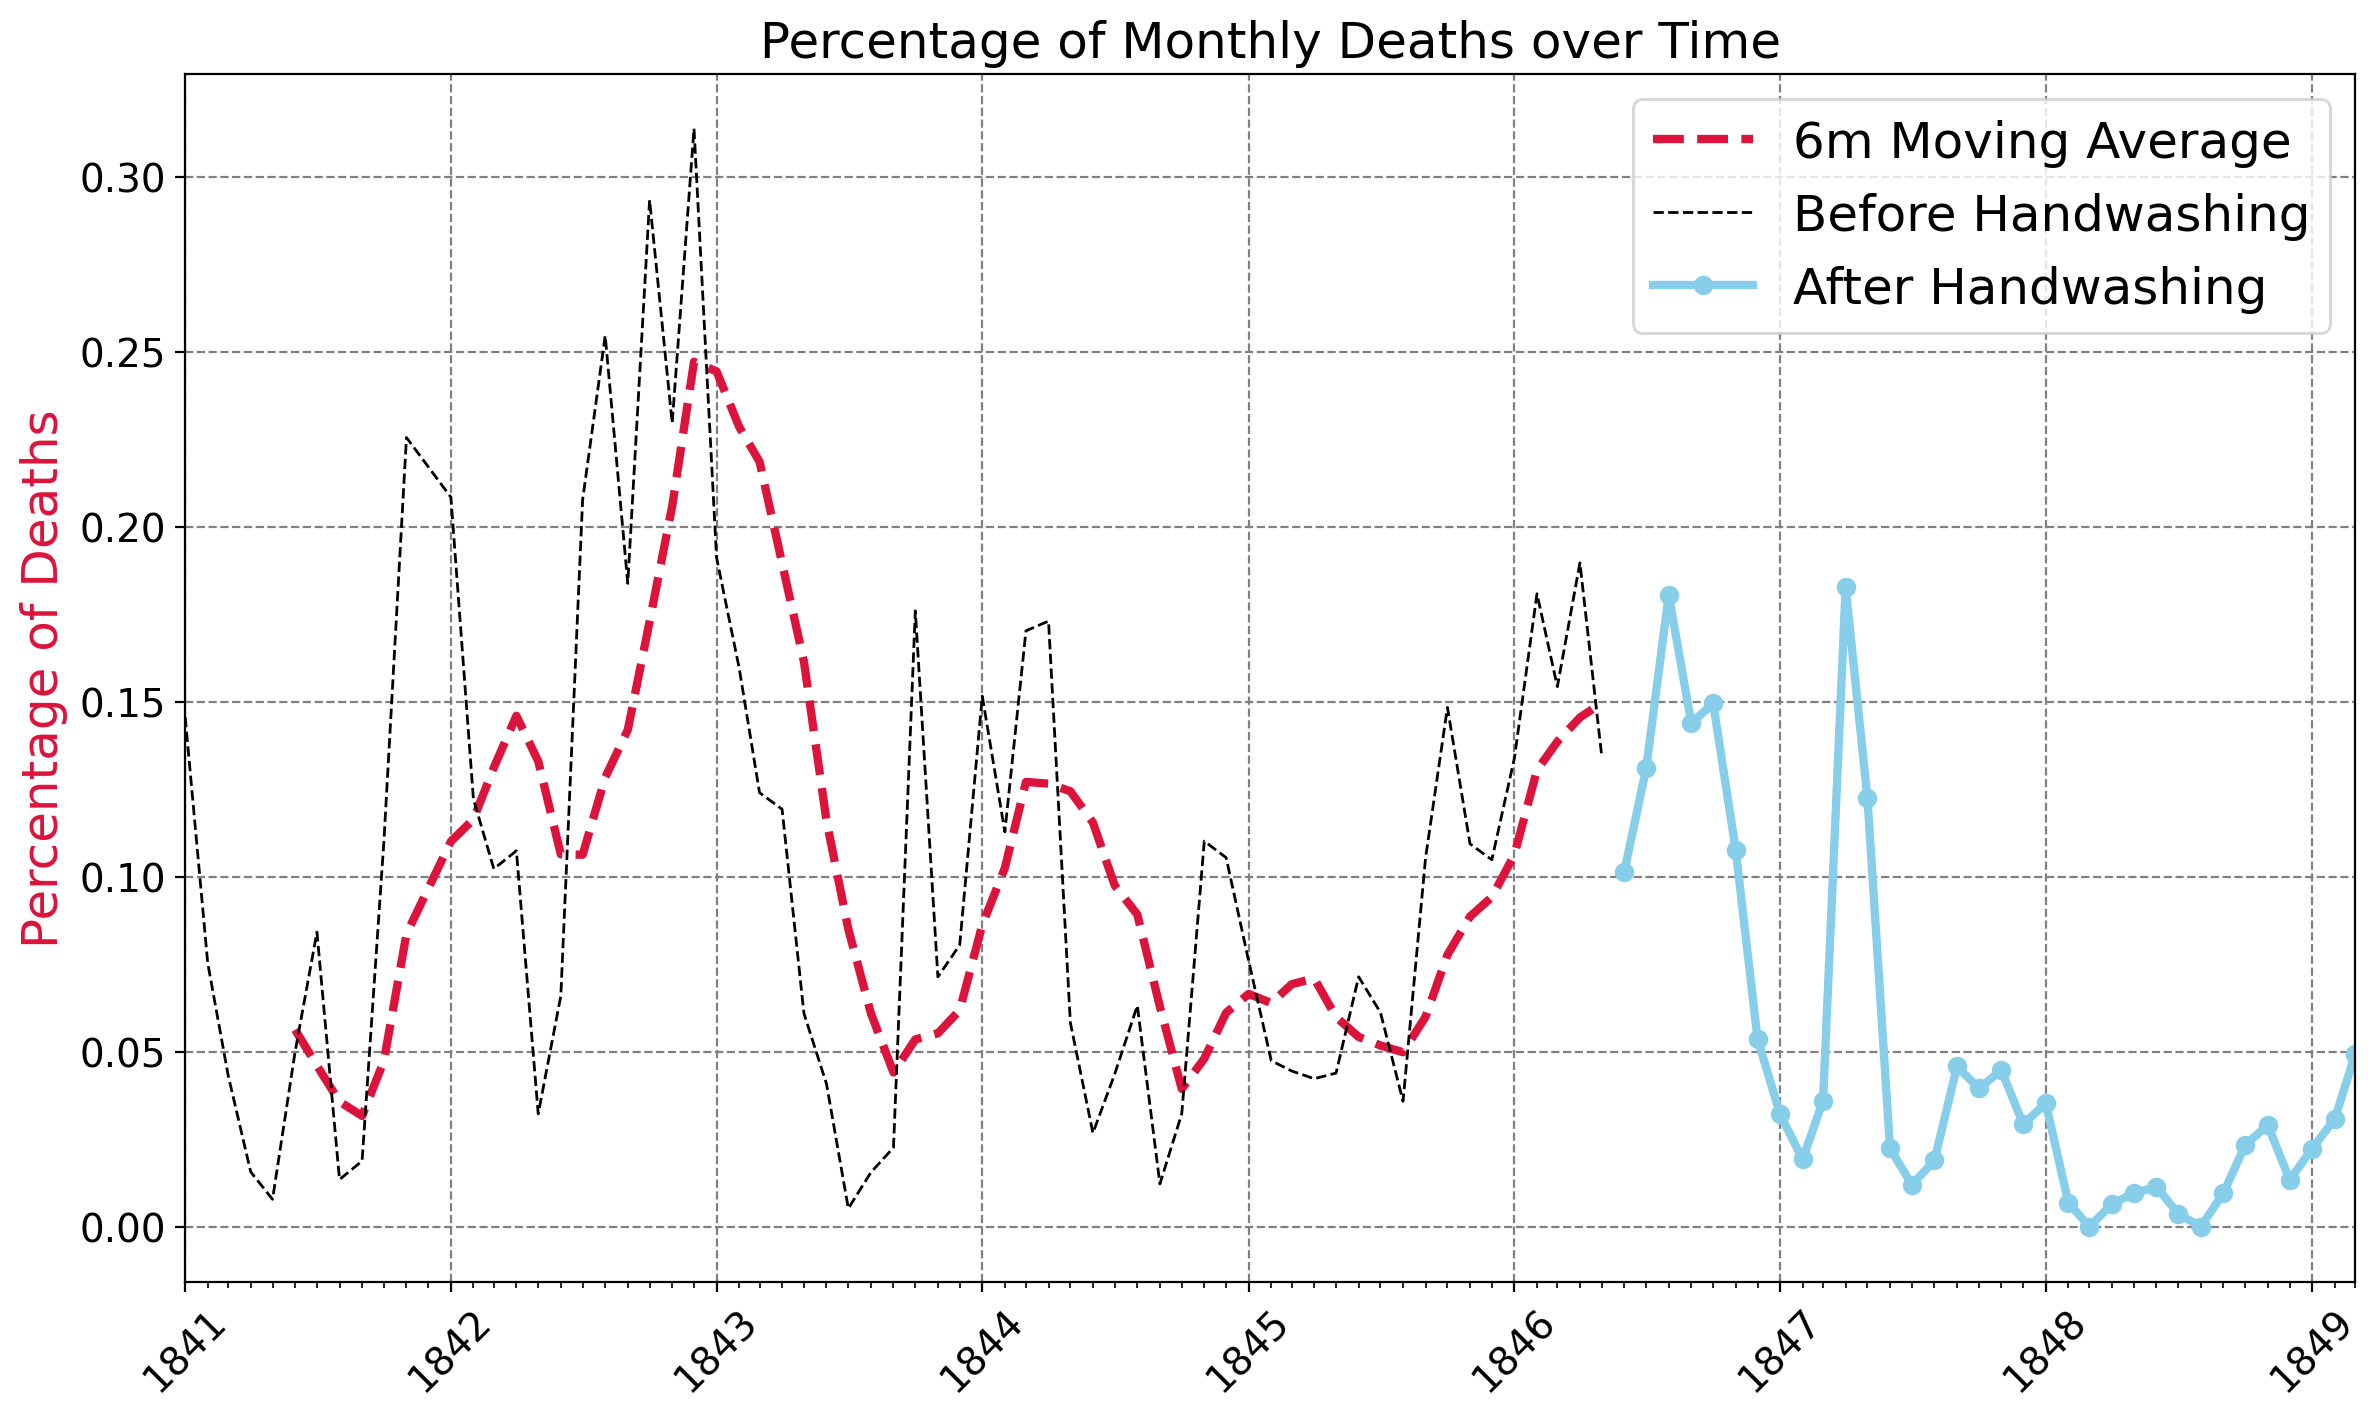

In [163]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(df_pre_wash.date, 
                    df_pre_wash.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(df_post_wash.date, 
                    df_post_wash.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

In [164]:
avg_prob_before = df_pre_wash.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = df_post_wash.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 5.07%.
Handwashing reduced the monthly proportion of deaths by 5.43%!
This is a 2.1x improvement!


In [165]:
handwashing_start = pd.to_datetime('1847-06-01')

In [168]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [169]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

In [170]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

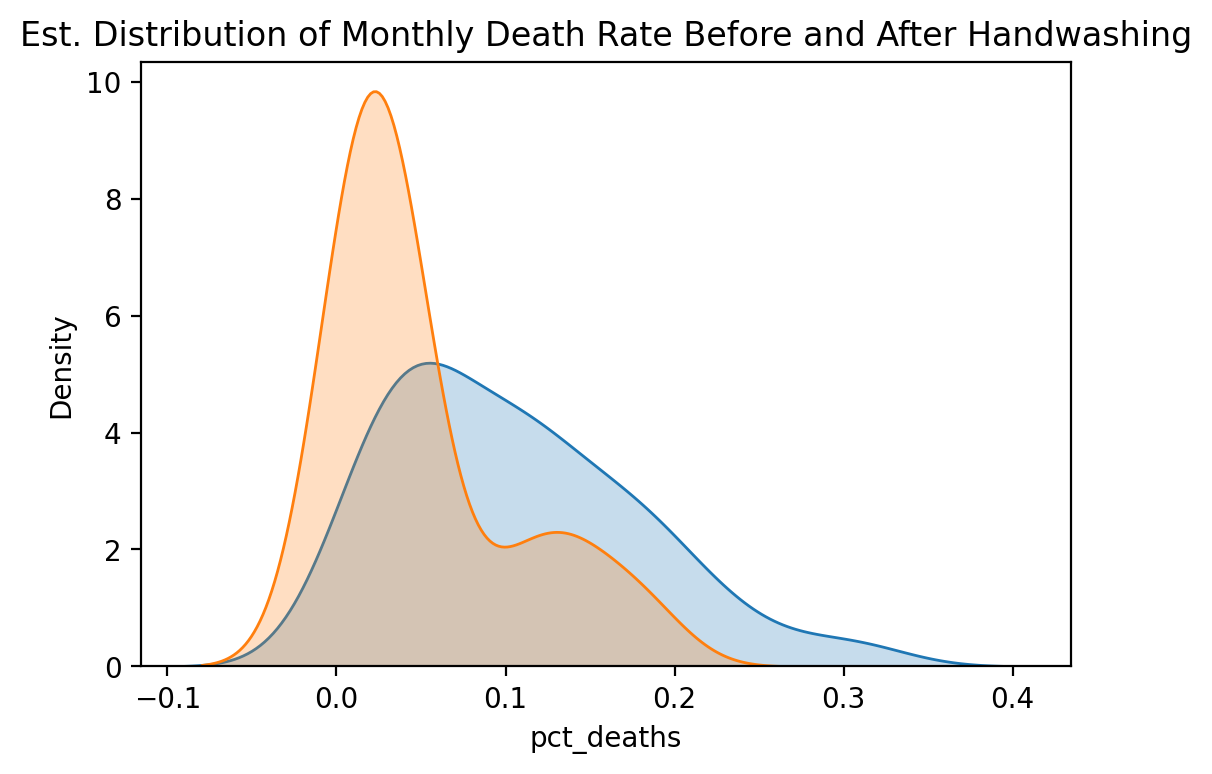

In [172]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(df_pre_wash.pct_deaths, shade=True)
sns.kdeplot(df_post_wash.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

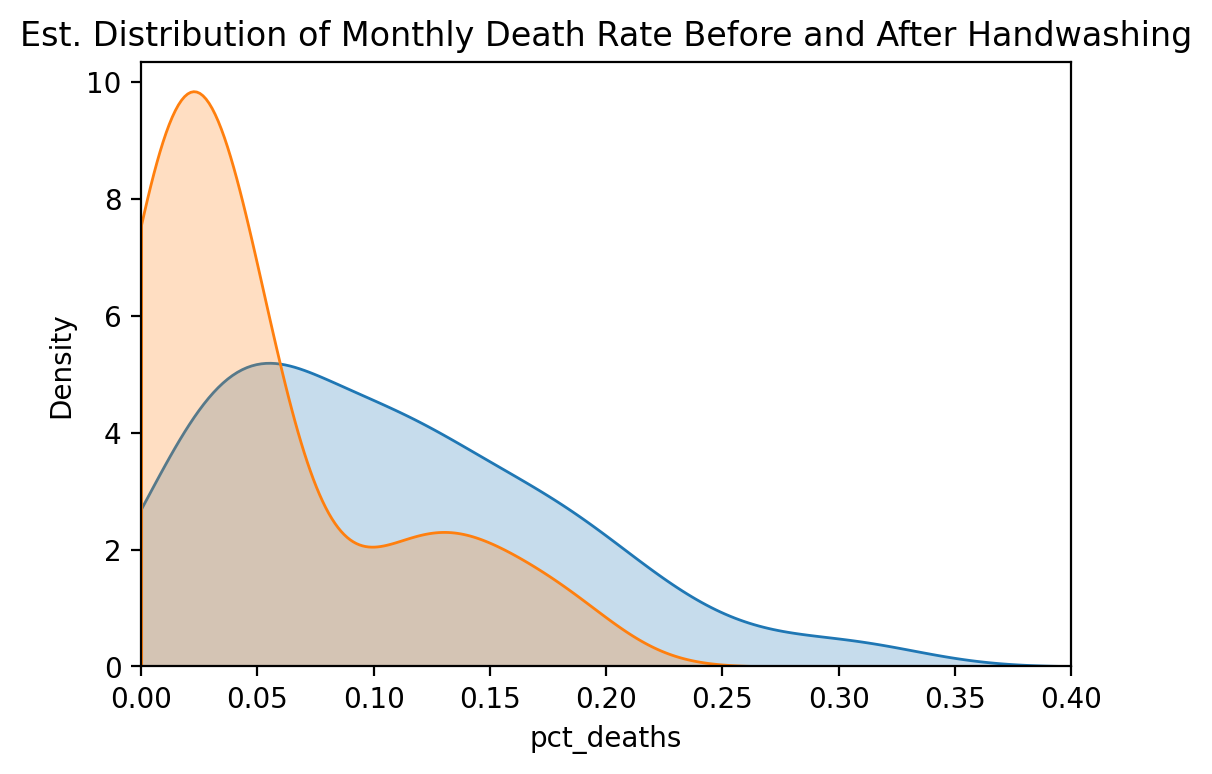

In [173]:
plt.figure(dpi=200)
sns.kdeplot(df_pre_wash.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(df_post_wash.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [174]:
t_stat, p_value = stats.ttest_ind(a=df_pre_wash.pct_deaths, 
                                  b=df_post_wash.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0002504345
t-statstic is 3.804
